In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import matplotlib.pyplot as plt

In [13]:
#For normalizing Data
def normalize(x_in, x_out):
    '''
    Given training datapoints x_in texting points x_out, 
    it returns normalized x_in and x_out
    Inputs:
        x_in: A (N, D) shaped training data.
        x_out: A (N, D) shaped testing data.

    Outputs:
        x_in, x_out: normalized data based on x_in
    '''
    x_in_norm = np.copy(x_in)
    x_out_norm = np.copy(x_out)
    n, d = x_in.shape
    std_dev = [0]*d 
    mean = [0]*d
    for j in range(d):
        mean[j] = np.mean(x_in[:, j])
        std_dev[j]= np.std(x_in[:, j])
    for i, x_i in enumerate(x_in):
        for  j, x in enumerate(x_i):
            if std_dev[j] != 0:
                x_in_norm[i,j] = (x - mean[j])/std_dev[j]
    for i, x_i in enumerate(x_out):
        for  j, x in enumerate(x_i):
            if std_dev[j] != 0:
                x_out_norm[i,j] = (x - mean[j])/std_dev[j]
    return x_in_norm, x_out_norm

In [14]:
X = np.loadtxt('train_2008.csv', skiprows = 1, delimiter = ',')
data = X[:, 3:-1]
labels = X[:, -1]
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2)

In [14]:
clf = RandomForestClassifier(max_depth = 20, n_estimators = 100)
clf.fit(X_train, y_train)
print('Train accuracy:', clf.score(X_train, y_train))
print('Test accuracy:', clf.score(X_test, y_test))

Train accuracy: 0.931533064002
Test accuracy: 0.778413483841


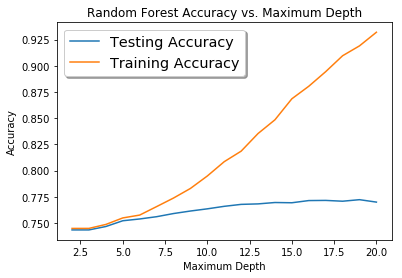

Test Accuracy maximized at max_depth = 19


In [6]:
def eval_tree_based_model_max_depth(clf, max_depth, X_train, y_train, X_test, y_test):
    test_acc = []
    train_acc = []
    for depth in max_depth:
        clf.set_params(max_depth = depth)
        clf.fit(X_train, y_train)
        train_acc.append(clf.score(X_train, y_train))
        test_acc.append(clf.score(X_test, y_test))
    return np.array(train_acc), np.array(test_acc)
clf = RandomForestClassifier(n_estimators = 100)

max_depth = np.arange(2, 21)

train_acc, test_acc = eval_tree_based_model_max_depth(clf, max_depth, X_train, y_train, X_test, y_test)

plt.figure()
plt.plot(max_depth, test_acc, label = 'Testing Accuracy')
plt.plot(max_depth, train_acc, label = 'Training Accuracy')
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy vs. Maximum Depth')
plt.legend(loc = 0, shadow = True, fontsize = 'x-large')
plt.show()

print('Test Accuracy maximized at max_depth = %i' %max_depth[np.argmax(test_acc)])

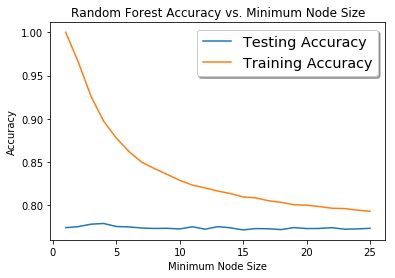

Test Accuracy maximized at minimum node size = 4
[ 0.77423844  0.77539818  0.77825885  0.77903201  0.77555281  0.77508891
  0.77377455  0.77331065  0.77346529  0.77276944  0.77524354  0.77246018
  0.77539818  0.77400649  0.77160971  0.77315602  0.77292408  0.77199629
  0.77431576  0.77315602  0.77331065  0.77416113  0.77246018  0.77276944
  0.77346529]


In [21]:
def eval_tree_based_model_min_split(clf, min_samples_leaf, X_train, y_train, X_test, y_test):
    test_acc = []
    train_acc = []
    for minimum in min_samples_leaf:
        clf.set_params(min_samples_leaf = minimum)
        clf.fit(X_train, y_train)
        train_acc.append(clf.score(X_train, y_train))
        test_acc.append(clf.score(X_test, y_test))
    return np.array(train_acc), np.array(test_acc)
clf = RandomForestClassifier(n_estimators = 100)

min_samples_leaf = np.arange(1, 26)

train_acc, test_acc = eval_tree_based_model_min_split(clf, min_samples_leaf, X_train, y_train, X_test, y_test)

plt.figure()
plt.plot(min_samples_leaf, test_acc, label = 'Testing Accuracy')
plt.plot(min_samples_leaf, train_acc, label = 'Training Accuracy')
plt.xlabel('Minimum Node Size')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy vs. Minimum Node Size')
plt.legend(loc = 0, shadow = True, fontsize = 'x-large')
plt.show()

print('Test Accuracy maximized at minimum node size = %i' %min_samples_leaf[np.argmax(test_acc)])
print(test_acc)

In [7]:
best_test_acc = 0
best_depth = 0
best_min_samples = 0
min_samples_leaf = np.arange(1, 26)
max_depth = np.arange(2, 21)
for i in max_depth:
    for j in min_samples_leaf:
        clf = RandomForestClassifier(n_estimators = 100, max_depth = i, min_samples_leaf = j)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        if score > best_test_acc:
            best_test_acc = score
            best_depth = i
            best_min_samples = j
print('Best Accuracy:', best_test_acc)  
print('Best Depth:', best_depth)
print('Best Min_samples:', best_min_samples)
f = open('results.txt', 'w+')
f.write("Best Accuracy: {}, Best Depth: {}, Best Min_samples: {}\n".format(best_test_acc, best_depth, best_min_samples))
f.close()

Best Accuracy: 0.772537498067
Best Depth: 16
Best Min_samples: 9


In [15]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(data, labels, test_size = 0.2)
clf = RandomForestClassifier(min_samples_leaf = 4, n_estimators = 100)
clf.fit(X_train2, y_train2)
print('Not Normalized:', clf.score(X_test2, y_test2))
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train2)
X_train2 = scaler.transform(X_train2)
X_test2 = scaler.transform(X_test2)
clf = RandomForestClassifier(min_samples_leaf = 4, n_estimators = 100)
clf.fit(X_train2, y_train2)
print('Normalized:', clf.score(X_test2, y_test2))

Not Normalized: 0.779418586671
Normalized: 0.777485696614


In [18]:
depth_score = 0
min_size_score = 0
depth_size_score = 0
for i in range(10):    
    X_train2, X_test2, y_train2, y_test2 = train_test_split(data, labels, test_size = 0.2)
    clf = RandomForestClassifier(max_depth = 19, n_estimators = 100)
    clf.fit(X_train2, y_train2)
    depth_score += clf.score(X_test2, y_test2)
    clf = RandomForestClassifier(min_samples_leaf = 4, n_estimators = 100)
    clf.fit(X_train2, y_train2)
    min_size_score += clf.score(X_test2, y_test2)
    clf = RandomForestClassifier(min_samples_leaf = 9, max_depth = 16, n_estimators = 100)
    clf.fit(X_train2, y_train2)
    depth_size_score += clf.score(X_test2, y_test2)
print('Not Normalized Max_depth:', depth_score / 10)
print('Not Normalized Min Node Size:', min_size_score / 10)
print('Not Normalized Min Node Size and Max Depth:', depth_size_score / 10)


Not Normalized Max_depth: 0.77636462038
Not Normalized Min Node Size: 0.777083655482
Not Normalized Min Node Size and Max Depth: 0.773550332457


In [33]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2)
X_train, X_test = normalize(X_train, X_test)
clf = RandomForestClassifier(n_estimators = 100, min_samples_leaf = 4)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

KeyboardInterrupt: 

In [23]:
# Make prediction
data = X[:, 3:-1]
labels = X[:, -1]

X_out = np.loadtxt('test_2008.csv', skiprows=1, delimiter =',')
ids = X_out[:, 0]
X_out = X_out[:, 3:]

X_train, X_test = normalize(data, X_out)
clf = clf = RandomForestClassifier(min_samples_leaf = 4, n_estimators = 100)
clf.fit(X_train, labels)
predictions = clf.predict_proba(X_test)
prediction = np.vstack((ids, predictions[:, 1])).T
np.savetxt('prediction.csv', prediction, fmt='%4f', delimiter = ',')

In [8]:
#Checking if oob_score(cross validation improves error)
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2)
X_train, X_test = normalize(X_train, X_test)
clf = RandomForestClassifier(n_estimators = 100, min_samples_leaf = 4, oob_score = True)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.778258852636462


In [ ]:
#Checking if oob_score(cross validation improves error)
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2)
X_train, X_test = normalize(X_train, X_test)
clf = RandomForestClassifier(n_estimators = 100, min_samples_leaf = 4, oob_score = True)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

In [53]:
def set_negative(X):
    '''Changing negative columns to -1'''
    X = np.copy(X)
    for i, x_i in enumerate(X):
        for  j, x in enumerate(x_i):
            if x == -9:
                X[i,j] = -2
            elif x == 0:
                X[i,j] = -6
    return X

In [54]:
def log_(X):
    '''Getting log of X 999999999 and 0 to 9999999999'''
    X = np.copy(X)
    for i, x_i in enumerate(X):
        for  j, x in enumerate(x_i):
            if x == 0:
                X[i,j] = 9999999999
            elif x < 0:
                X[i,j] = 999999999
            else:
                X[i,j] = np.log(x)
    return X

In [5]:
def count_negative(arr):
    '''True if there are less than 99% of negative values in array'''
    n = arr.size
    count = 0
    for x in arr:
        if x<0:
            count += 1
    if n*0.992 <= count:
        return False
    return True

In [6]:
def clean(X):
    '''processing data'''
    n, d = X.shape
    lst = []
    for j in range(d):
        if count_negative(X[:, j])== True:
            lst.append(j)
    return lst

In [104]:
#Clean data
print('Cleaning')
score = 0
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 52)
indexs = clean(X_train)
X_train = X_train[:,indexs]
X_test = X_test[:,indexs]
clf = RandomForestClassifier(n_estimators = 100, min_samples_leaf = 4)
for i in range(5):
    clf.fit(X_train, y_train)
    s = clf.score(X_test, y_test)
    print(s)
    score+=s
print('Average: ' + str(score/5.0))

Cleaning
0.7723828668625329
0.7738518633060152
0.7741611257151694
0.7731560228854183
0.7696768207824339
Average: 0.7726457399103139


In [109]:
#Clean + cross
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 52)
indexs = clean(X_train)
X_train = X_train[:,indexs]
X_test = X_test[:,indexs]
score = 0
clf = RandomForestClassifier(n_estimators = 100, min_samples_leaf = 4, oob_score = True)
for i in range(5):
    clf.fit(X_train, y_train)
    s = clf.score(X_test, y_test)
    score += s
    print(s)
print('Average: ' + str(score/5.0))

0.7738518633060152
0.7726921292716871
0.7726148136693984
0.773697232101438
0.7722282356579557
Average: 0.7730168548012989


In [111]:
#clean + cross + normalizing
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 52)
indexs = clean(X_train)
X_train = X_train[:,indexs]
X_test = X_test[:,indexs]
score = 0
clf = RandomForestClassifier(n_estimators = 100, min_samples_leaf = 4, oob_score = True)
X_train, X_test = normalize(X_train, X_test)
for i in range(5):
    clf.fit(X_train, y_train)
    s = clf.score(X_test, y_test)
    score += s
    print(s)
print('Average: ' + str(score/5.0))

0.7713777640327818
0.7732333384877068
0.771841657646513
0.7714550796350703
0.7711458172259162
Average: 0.7718107314055975


In [15]:
#Clean + normalizing
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 52)
indexs = clean(X_train)
X_train = X_train[:,indexs]
X_test = X_test[:,indexs]
score = 0
clf = RandomForestClassifier(n_estimators = 100, min_samples_leaf = 4)
X_train, X_test = normalize(X_train, X_test)
for i in range(5):
    clf.fit(X_train, y_train)
    s = clf.score(X_test, y_test)
    score += s
    print(s)
print('Average: ' + str(score/5.0))

0.7742384413174579
0.7730013916808411
0.7732333384877068
0.7733106540899953
0.7728467604762641
Average: 0.7733261172104531


In [119]:
#Clean + min_impurity split
lst= [0,0.00001,0.0001,0.001,0.1]
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 52)
indexs = clean(X_train)
X_train = X_train[:,indexs]
X_test = X_test[:,indexs]
clf = RandomForestClassifier(n_estimators = 100, min_samples_leaf = 4)
for l in lst:
    score = 0
    clf.set_params(min_impurity_decrease = l)
    for i in range(5):
        clf.fit(X_train, y_train)
        s = clf.score(X_test, y_test)
        score += s
    print('impurity_split: ' + str(l) + ' Average: ' + str(score/5.0))

impurity_split: 0 Average: 0.7725529611875677
impurity_split: 1e-05 Average: 0.7724911087057369
impurity_split: 0.0001 Average: 0.7660584505953302
impurity_split: 0.001 Average: 0.7443018401113346
impurity_split: 0.1 Average: 0.7442399876295036


In [118]:
#Clean + bootstrp = false
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 52)
indexs = clean(X_train)
X_train = X_train[:,indexs]
X_test = X_test[:,indexs]
score = 0
clf = RandomForestClassifier(n_estimators = 100, min_samples_leaf = 4, bootstrap = False)
for i in range(5):
    clf.fit(X_train, y_train)
    s = clf.score(X_test, y_test)
    score += s
    print(s)
print('Average: ' + str(score/5.0))

0.7771764342044225
0.7736199164991495
0.7733106540899953
0.7760167001700943
0.7748569661357662
Average: 0.7749961342198856


In [16]:
#Clean + bootstrp = false + normalize
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 52)
indexs = clean(X_train)
X_train = X_train[:,indexs]
X_test = X_test[:,indexs]
X_train, X_test = normalize(X_train, X_test)
score = 0
clf = RandomForestClassifier(n_estimators = 100, min_samples_leaf = 4, bootstrap = False)
for i in range(5):
    clf.fit(X_train, y_train)
    s = clf.score(X_test, y_test)
    score += s
    print(s)
print('Average: ' + str(score/5.0))

0.773542600896861
0.7760167001700943
0.7754754909540745
0.7729240760785526
0.7758620689655172
Average: 0.7747641874130199


In [58]:
#Testing for effects of log vs normalizing vs set negative
print('Without anything')
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 52)
    clf = RandomForestClassifier(n_estimators = 100, min_samples_leaf = 4)
    clf.fit(X_train, y_train)
    print(clf.score(X_test, y_test))
print('With set negative + normalizing')
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 52)
    X_train = set_negative(X_train)
    X_test = set_negative(X_test)
    X_train, X_test = normalize(X_train, X_test)
    clf = RandomForestClassifier(n_estimators = 100, min_samples_leaf = 4)
    clf.fit(X_train, y_train)
    print(clf.score(X_test, y_test))

Without anything
0.7739291789083037
0.7729240760785526
0.7723055512602444
0.7741611257151694
0.7709911860213391
With set negative + normalizing
0.7713004484304933
0.7710685016236276
0.7723828668625329
0.7730787072831298
0.7721509200556672


In [16]:
# Make prediction
data = X[:, 3:-1]
labels = X[:, -1]

X_out = np.loadtxt('test_2008.csv', skiprows=1, delimiter =',')
ids = X_out[:, 0]
X_out = X_out[:, 3:]

X_train, X_test = normalize(data, X_out)
clf = RandomForestClassifier(n_estimators = 100, min_samples_leaf = 4, oob_score = True)
clf.fit(X_train, labels)

predictions = clf.predict_proba(X_test)
prediction = np.vstack((ids, predictions[:, 1])).T
np.savetxt('prediction2.csv', prediction, fmt='%4f', delimiter = ',')

In [17]:
np.savetxt('prediction3.csv', X_train, fmt='%4f', delimiter = ',')

In [11]:
# Clean
for i in range(5):
    data = X[:, 3:-1]
    labels = X[:, -1]

    X_out = np.loadtxt('test_2008.csv', skiprows=1, delimiter =',')
    ids = X_out[:, 0]
    X_out = X_out[:, 3:]

    indexs = clean(data)
    X_train = data[:,indexs]
    X_test = X_out[:,indexs]
    clf = RandomForestClassifier(n_estimators = 100, min_samples_leaf = 4, bootstrap = False)
    clf.fit(X_train, labels)

    predictions = clf.predict_proba(X_test)
    prediction = np.vstack((ids, predictions[:, 1])).T
    name = str(i)+'_predictions.csv'
    np.savetxt(name, prediction, fmt='%4f', delimiter = ',')
    print(str(i) + ' : ' + str(clf.score(X_train, labels)))

0 : 0.9638610110257163
1 : 0.9640465770794996
2 : 0.9638300833500858
3 : 0.9637373003231942
4 : 0.9638610110257163


In [9]:
print(clf.score(X_train, labels))

0.9637991556744553
